In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from sklearn.cluster import KMeans
import numpy as np

# Load the dataset
content_df = pd.read_csv('https://raw.githubusercontent.com/RakeshBH23/Netflix-Data-Analysis/main/Netflix-Data-Analysis.csv')


## 1. Data Overview & Missing Values

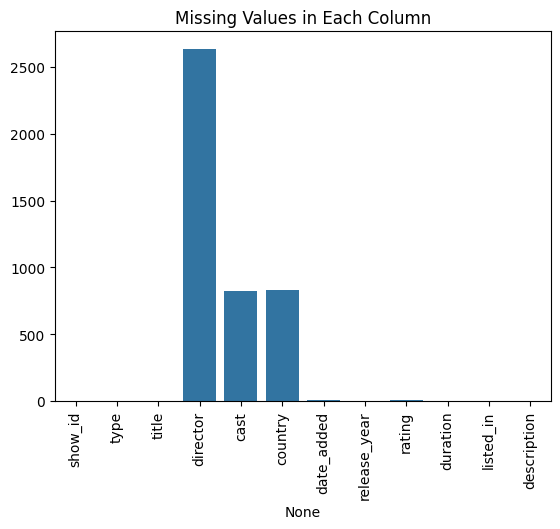

In [4]:
missing_values = content_df.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.show()

## 2. Content Distribution

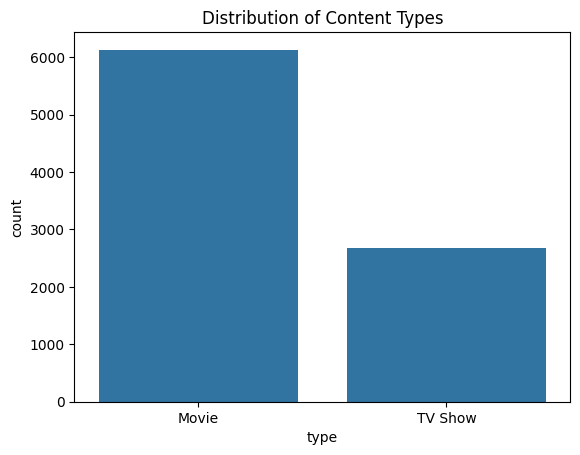

In [5]:
sns.countplot(x='type', data=content_df)
plt.title('Distribution of Content Types')
plt.show()

## 3. Top Directors

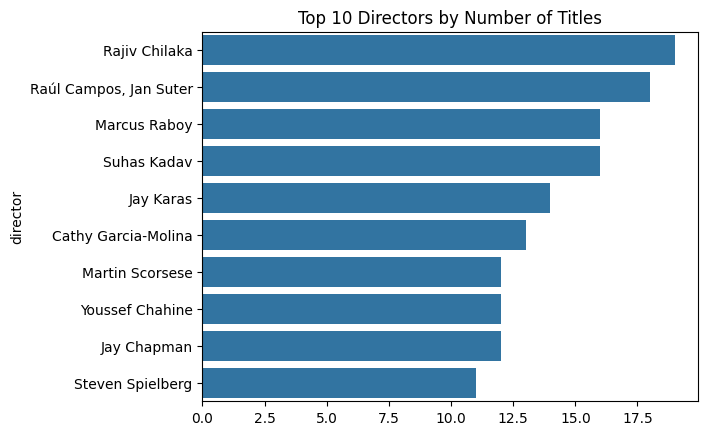

In [6]:
top_directors = content_df['director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title('Top 10 Directors by Number of Titles')
plt.show()

## 4. Cast Analysis

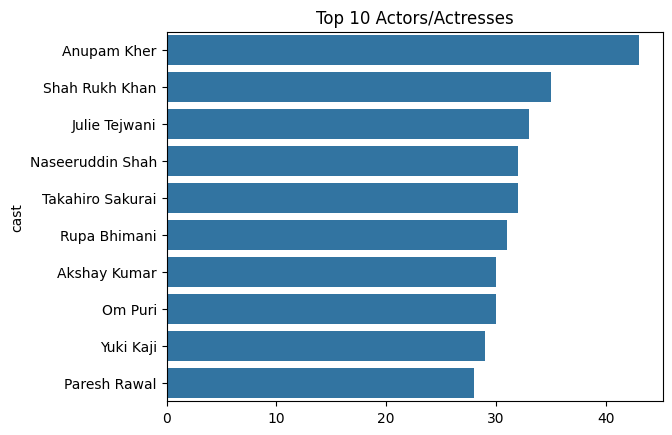

In [7]:
cast_members = content_df['cast'].dropna().str.split(', ').explode()
top_cast = cast_members.value_counts().head(10)
sns.barplot(y=top_cast.index, x=top_cast.values)
plt.title('Top 10 Actors/Actresses')
plt.show()

## 5. Content by Country

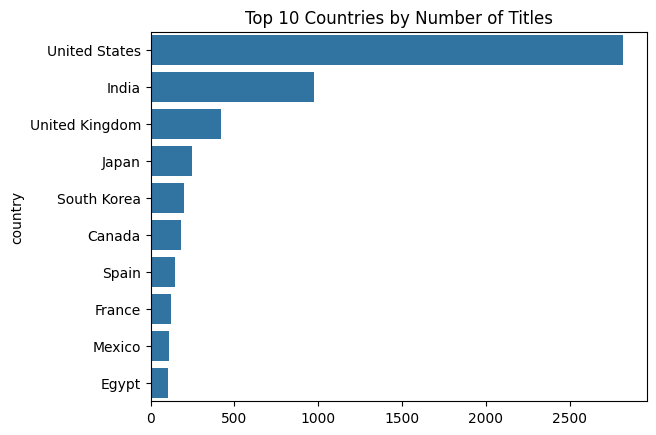

In [8]:
top_countries = content_df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Number of Titles')
plt.show()

## 6. Release Year Distribution

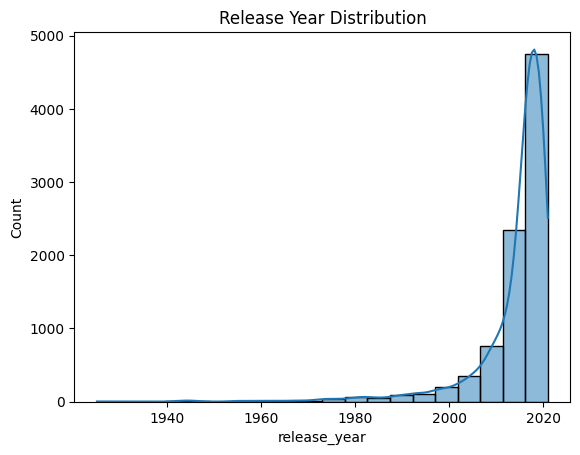

In [9]:
sns.histplot(content_df['release_year'], bins=20, kde=True)
plt.title('Release Year Distribution')
plt.show()

## 7. Word Cloud of Titles

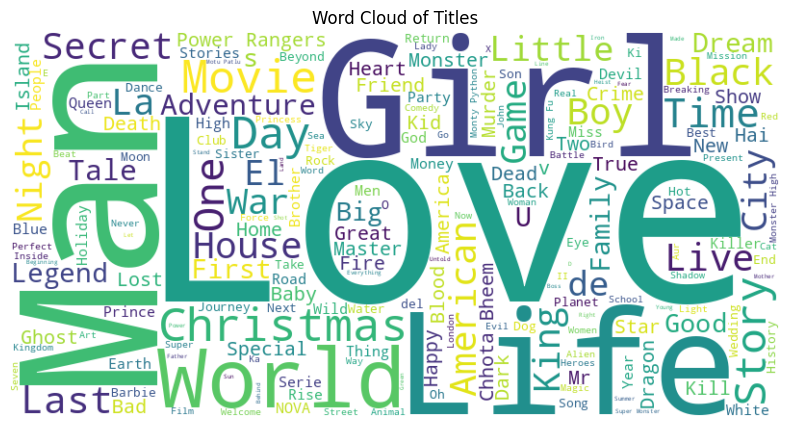

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(content_df['title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

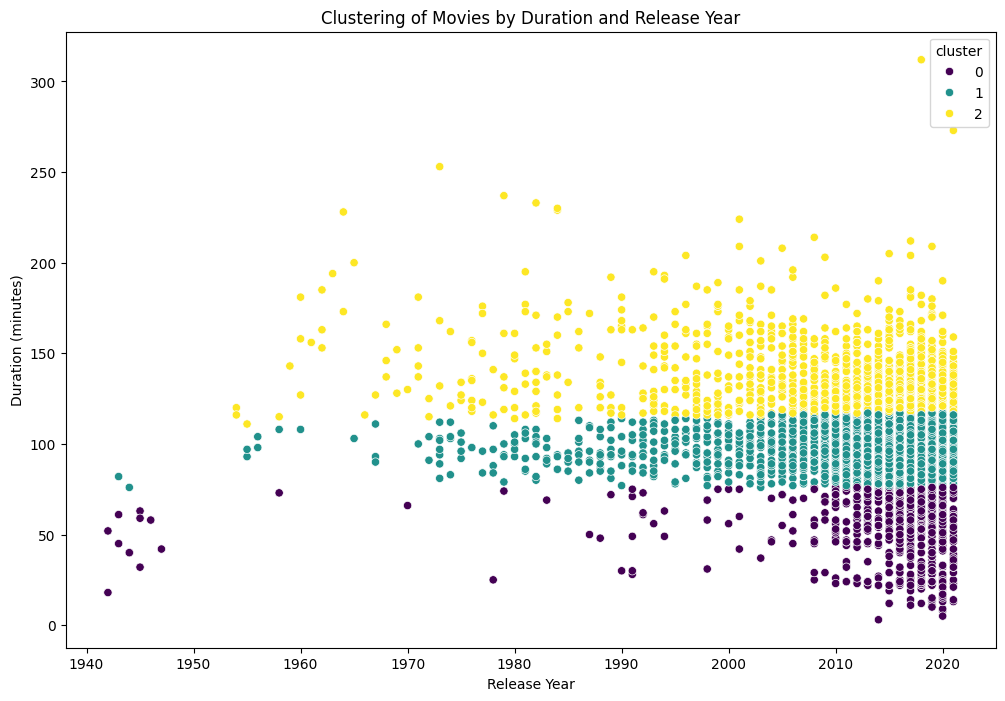

In [15]:
# Extract only movies from the dataset
movies = content_df[content_df['type'] == 'Movie'].copy()

# Convert 'duration' column to numeric (removing ' min' text)
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)

# Remove missing values for clustering
movies_filtered = movies.dropna(subset=['duration', 'release_year']).copy()

# Prepare data for clustering
X = movies_filtered[['duration', 'release_year']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Assign cluster labels safely
movies_filtered.loc[:, 'cluster'] = kmeans.labels_

# Plot clustering results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=movies_filtered, x='release_year', y='duration', hue='cluster', palette='viridis')
plt.title('Clustering of Movies by Duration and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()


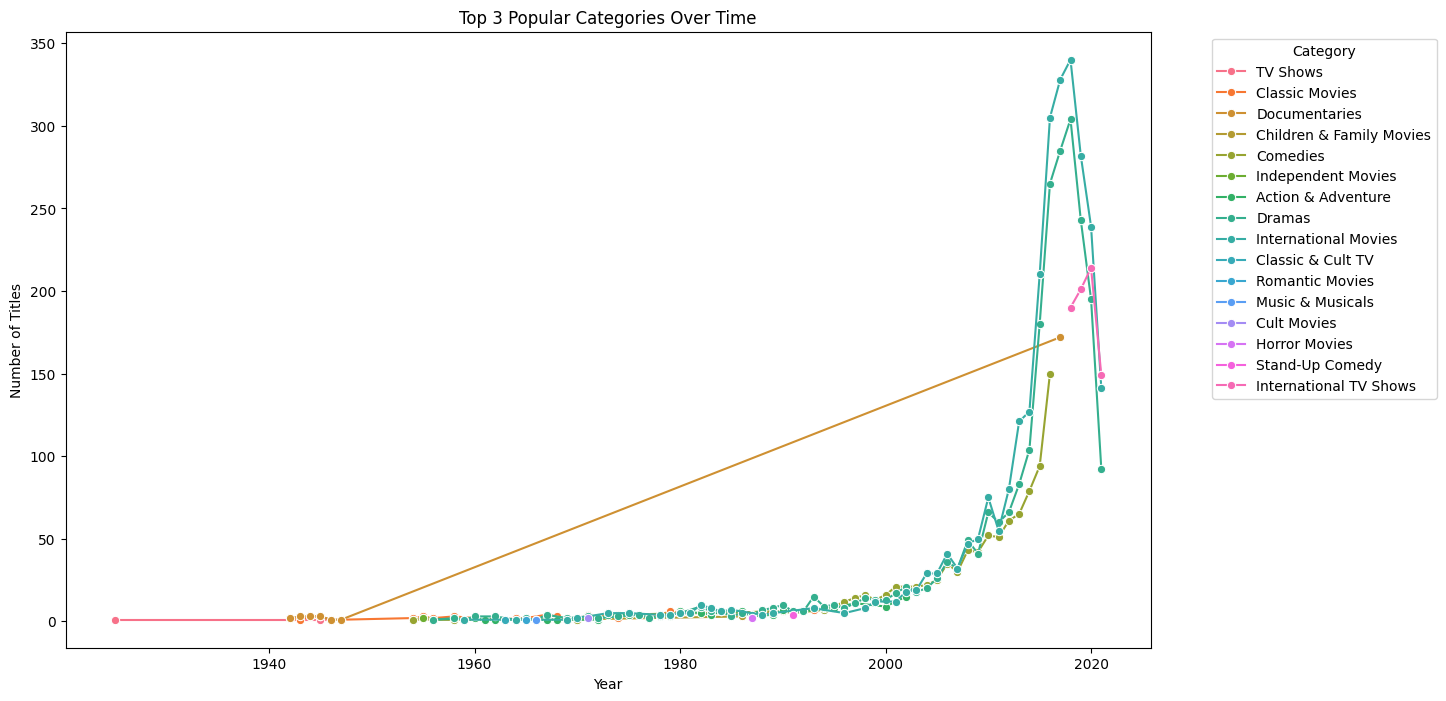

In [16]:
df_exploded = content_df.assign(listed_in=content_df['listed_in'].str.split(', ')).explode('listed_in')
popular_years = df_exploded.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
top_categories_by_year = popular_years.sort_values(['release_year', 'count'], ascending=[True, False]).groupby('release_year').head(3)

plt.figure(figsize=(14, 8))
sns.lineplot(data=top_categories_by_year, x='release_year', y='count', hue='listed_in', marker='o')
plt.title('Top 3 Popular Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()